**AI-CA3 Mohammad hosein Aghili  810199576**

In [35]:
import pickle
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2

pkl_file = open('data.pkl', 'rb')
datas = pickle.load(pkl_file)

pkl_file = open('label.pkl', 'rb')
labels = pickle.load(pkl_file) 

print(len(datas),len(labels))

6000 6000


In [36]:
train_data = []
test_data = []
train_labels =[]
test_labels = []
rate = 0.8
for i in range(0, len(labels)):
    if i < rate * len(labels):
        train_data.append(datas[i])
    else:
        test_data.append(datas[i])

train_labels = labels[0:len(train_data)]
test_labels = labels[len(train_data):len(datas)]
# print(len(train_data),len(train_labels),len(test_data),len(test_labels),len(labels),len(datas))
# print(type(datas))

نسبت تقسیم 80-20 یک تقسیم رایج برای  و تست  است. زیرا تعادل خوبی بین داشتن داده های کافی برای آموزش مدل و داشتن داده های کافی برای ارزیابی عملکرد آن فراهم می کند. استفاده از داده‌های بسیار کم برای ترین می‌تواند منجر به عدم تناسب شود، که در آن مدل به اندازه کافی پیچیده نیست تا الگوهای اساسی در داده‌ها را به تصویر بکشد، در حالی که استفاده از داده‌های بسیار کم برای تست می‌تواند منجر به برازش بیش از حد شود، جایی که مدل داده‌های آموزشی را به خاطر می‌سپارد و عملکرد ضعیفی در آن دارد.

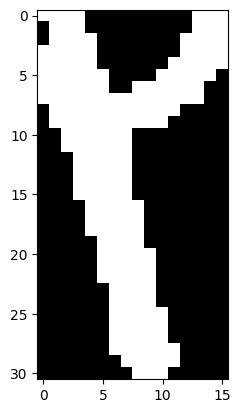



Minimum pixel value: 0 , Maximum pixel value: 255


In [37]:

random_image = train_data[random.randint(0,len(train_data))]

plt.imshow(random_image, cmap='gray')
plt.show()

min_pixel_value = np.min(random_image)
max_pixel_value = np.max(random_image)

print("\n\nMinimum pixel value:", min_pixel_value,", Maximum pixel value:", max_pixel_value)


In [38]:
from skimage.transform import resize

# Resize all images to 20x20
# resized_datas = [resize(img, (20, 20), anti_aliasing=True) for img in datas]
resized_datas = []
for img in datas:
    imgg = cv2.resize(np.array(img), (20,20))
    resized_datas.append(imgg)

train_data = []
test_data = []
train_labels =[]
test_labels = []
rate = 0.8
for i in range(0, len(labels)):
    if i < rate * len(labels):
        train_data.append(resized_datas[i])
    else:
        test_data.append(resized_datas[i])

train_labels = labels[0:len(train_data)]
test_labels = labels[len(train_data):len(resized_datas)]
# print(len(train_data),len(train_labels),len(test_data),len(test_labels),len(labels),len(resized_datas))
# print(type(resized_datas))



مزایا:
پیچیدگی محاسباتی را کاهش می دهد: هنگام کار با الگوریتم ها هوش، پردازش تصاویر کوچکتر از نظر محاسباتی هزینه کمتری دارد. با تغییر اندازه تصاویر، تعداد پیکسل هایی که باید پردازش شوند را کاهش می دهیم که این امر روند آموزش را سرعت می بخشد.

تعمیم را بهبود می بخشد: هنگامی که اندازه تصاویر متفاوت است، مدل باید یاد بگیرد که چگونه تصاویر  اندازه های مختلف را مدیریت کند، که کار را پیچیده تر می کند. با تغییر اندازه همه تصاویر به یک اندازه، کار را  ساده تر می کنیم و این می تواند به تعمیم بهتر منجر شود.

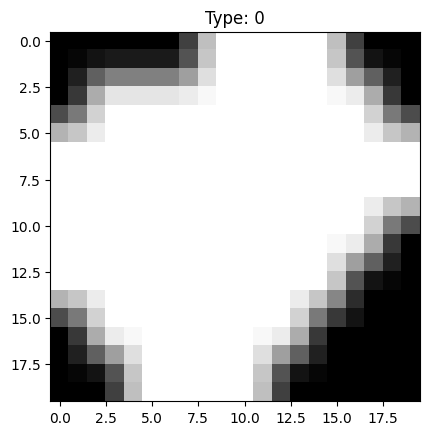

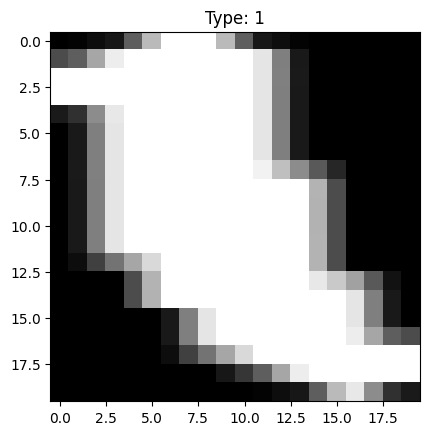

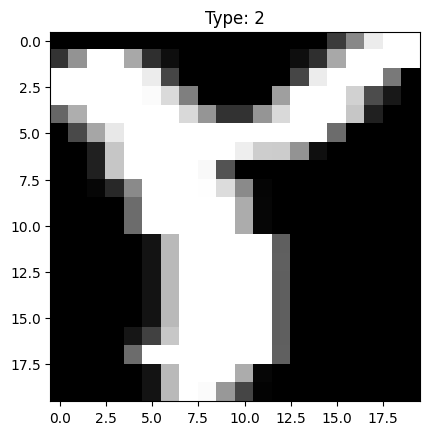

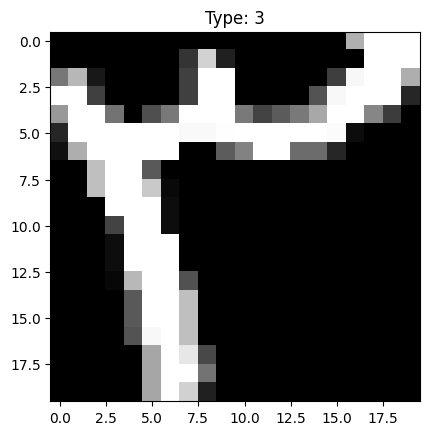

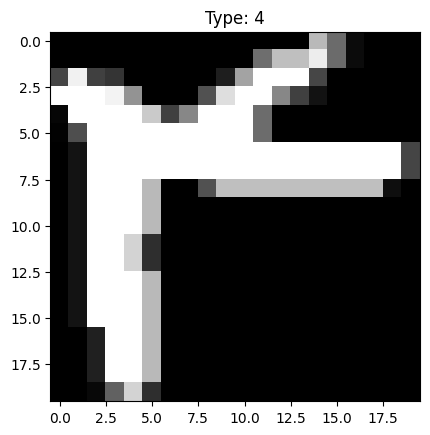

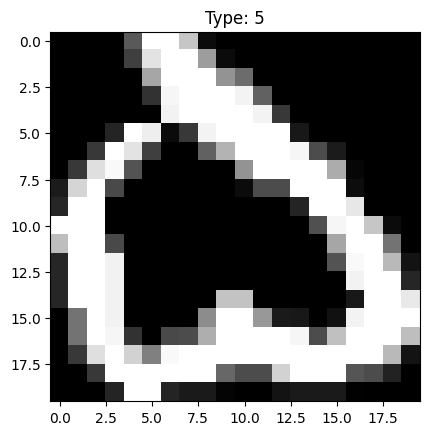

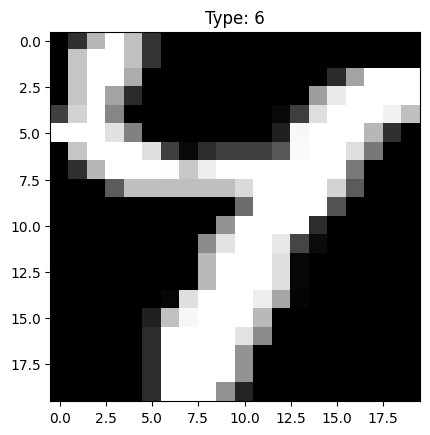

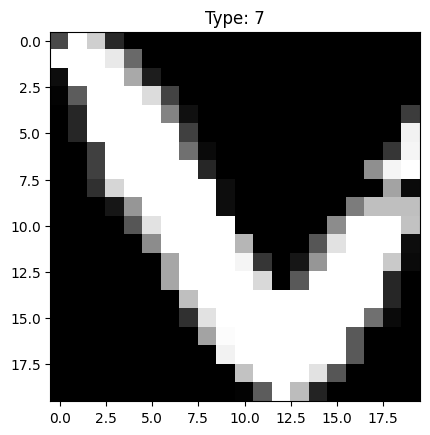

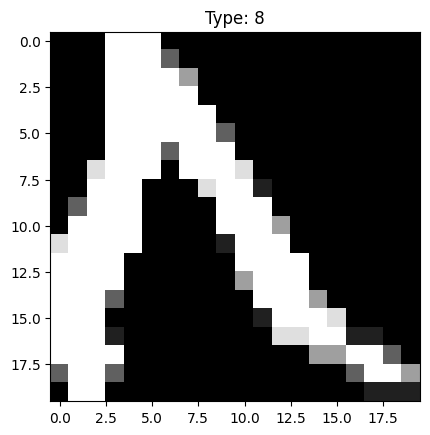

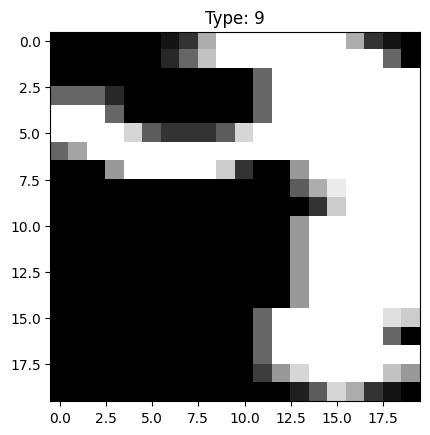

In [39]:

classed_data = [[], [], [], [], [], [], [], [], [], []]
for i in range(len(train_labels)):
    classed_data[labels[i]].append(train_data[i])

for i in range(10):
    plt.imshow(classed_data[i][random.randint(0,len(classed_data[i]))], cmap='gray')
    plt.title(f"Type: {i}")
    plt.show()

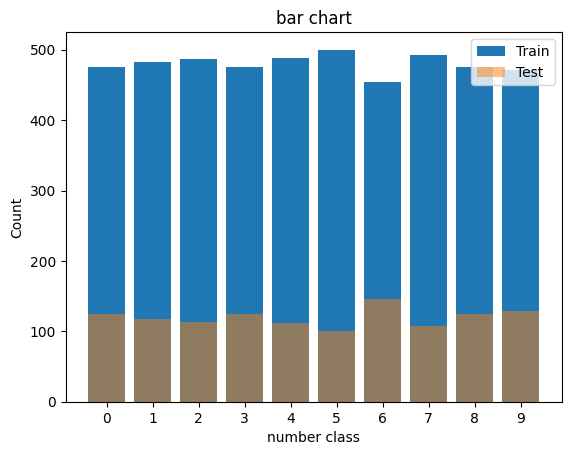

In [40]:
import matplotlib.pyplot as plt

train_counts = [0] * 10
for label in train_labels:
    train_counts[label] += 1

test_counts = [0] * 10
for label in test_labels:
    test_counts[label] += 1

plt.bar(range(10), train_counts, label='Train')
plt.bar(range(10), test_counts, label='Test', alpha=0.5)
plt.xticks(range(10))
plt.xlabel('number class')
plt.ylabel('Count')
plt.title('bar chart')
plt.legend()
plt.show()

In [41]:
for z in range(0, len(test_data)):
    for i in range(0, 20):
        for j in range(0, 20):
            test_data[z][i][j] = test_data[z][i][j] / 255

for z in range(0, len(train_data)):
    for i in range(0, 20):
        for j in range(0, 20):
            train_data[z][i][j] = train_data[z][i][j] / 255



 8&9-
 زیرا می تواند عملکرد الگوریتم را بهبود بخشد. اگر داده‌ها مقیاس‌بندی نشده باشند، برخی از ویژگی‌ها (در این پروژه مقادیر پیکسل‌ها) ممکن است بر بقیه چیره شوند، زیرا مقادیر بزرگ‌تری دارند ممکن است منجر به عملکرد ضعیف تر شود. با مقیاس بندی مقادیر پیکسل بین 0 و 1، اطمینان حاصل می کنیم که هر پیکسل به طور مساوی در طبقه بندی نقش دارد و از این سوگیری جلوگیری می کنیم. به‌علاوه، مقیاس‌گذاری داده‌ها می‌تواند الگوریتم را از نظر عددی پایدارتر کند و از مشکلات سرریز عددی جلوگیری کند.

   

evidence:  داده های مشاهده شده در مورد ما هستند، این مقادیر پیکسل های تصویری است که می خواهیم طبقه بندی کنیم.

Preor:  توزیع احتمال طبقات قبل از مشاهده شواهد است. در مورد ما، این احتمال وجود یک رقم معین در مجموعه داده است.

Likelihood: احتمال تعلق شواهد به طبقه خاصی است. در مورد ما، این احتمال مشاهده یک مقدار پیکسل با توجه به کلاس است.

prior: پسین احتمال یک کلاس با توجه به شواهد است. به عبارت دیگر، این احتمال است که یک تصویر داده شده با توجه به مقادیر پیکسل آن به کلاس خاصی تعلق دارد.

برای محاسبه احتمال پسین یک کلاس با توجه به شواهد، از قضیه بیز استفاده می کنیم:

تقسیم بر صفر زمانی رخ می دهد که واریانس یک ویژگی برای یک کلاس خاص صفر باشد. این می تواند زمانی اتفاق بیفتد که فقط یک نمونه از کلاس در مجموعه آموزشی وجود داشته باشد. برای جلوگیری از این امر، یک مقدار ثابت کوچک به واریانس هر ویژگی و هر کلاس اضافه می شود. به این نرم‌افزار افزودنی یا صاف‌سازی لاپلاس می‌گویند. با انجام این کار، محاسبه احتمال منجر به تقسیم بر صفر نمی شود و مدل می تواند داده های جدید را به طور موثرتری مدیریت کند. هموارسازی افزایشی یک تکنیک متداول است که در مدل‌های احتمالی برای مدیریت احتمالات صفر استفاده می‌شود.

Gaussian Naive Bayes algorithm:

In [42]:
#initialize mean and vars lists

means = []
vars = []
for i in range(0, 10):
    temp = []
    for j in range(0, 20):
        temp.append([0 for k in range(20)])
    means.append(temp)

for i in range(0, 10):
    temp = []
    for j in range(0, 20):
        temp.append([0 for k in range(20)])
    vars.append(temp)


In [44]:
for num in range(0, 10):
   for i in range(0, 20):
      for j in range(0, 20):
          for k in range(0, len(train_data)):
              if labels[k] == num:
                 means[num][i][j] = means[num][i][j] + train_data[k][i][j]
          means[num][i][j] = means[num][i][j] / train_counts[num]
          for k in range(0, len(train_data)):
              if labels[k] == num:
                    vars[num][i][j] = vars[num][i][j] + (means[num][i][j] - train_data[k][i][j]) ** 2
          vars[num][i][j] = vars[num][i][j] / train_counts[num]
          vars[num][i][j] = vars[num][i][j] + 10 ** -3 #Additive Smoothing

In [43]:
# print(vars)

In [45]:
def calculateGB(test_id):
    p = [1 for i in range(10)]
    for num in range(10):
        for i in range(20):
            for j in range(20):
                mean = means[num][i][j]
                var = vars[num][i][j]
                p[num] = p[num] *  ((1 / (2 * np.pi * var)) * (np.e ** ((-1 * (resized_datas[test_id][i][j] - mean) ** 2) / (2 * var))))
    res = p.index(max(p))
    return res
GB = []
for i in range(0, len(test_data)):
    GB.append(calculateGB(len(train_data)+i))



In [46]:
# print(GB)

**Bernoulli Naive Bayes:**

In [49]:
blacks_pix = []
both_pix = []

for i in range(10):
    temp = []
    for j in range(20):
        k = [0 for l in range (20)]
        temp.append(k)
    blacks_pix.append(temp)
for i in range(10):
    temp = []
    for j in range(20):
        k = [0 for l in range (20)]
        temp.append(k)
    both_pix.append(temp)

# print(blacks, both)

In [50]:
for i in range(0, len(train_data)):
    for j in range(20):
        for k in range(20):
            if (train_data[i][j][k] > 0.5):
                blacks_pix[labels[i]][j][k] = blacks_pix[labels[i]][j][k] + 1
            both_pix[labels[i]][j][k] = both_pix[labels[i]][j][k] + 1

# print(blacks_pix, both_pix)

In [51]:
def calculateBNB(test_id):
    probability = [1 for i in range(10)]
    for num in range(0, 10):
        for i in range(0, 20):
            for j in range(0, 20):
                if resized_datas[test_id][i][j] > 0.5:
                    probability[num] = probability[num] * (blacks_pix[num][i][j] / both_pix[num][i][j])
                else:    
                    probability[num] = probability[num] * (1 - (blacks_pix[num][i][j] / both_pix[num][i][j]))
        probability[num] = probability[num] * (train_counts[num] / len(train_data))
    res = probability.index(max(probability))
    return res

BNB = []
for i in range(0, len(test_data)):
    BNB.append(calculateBNB(len(train_data)+i))

In [ ]:
# print(BNB)

[7, 3, 1, 5, 4, 5, 3, 2, 0, 0, 8, 0, 2, 8, 0, 2, 3, 3, 1, 5, 8, 4, 2, 6, 8, 1, 7, 5, 8, 6, 0, 0, 3, 5, 7, 1, 5, 8, 9, 1, 7, 3, 2, 9, 6, 2, 8, 0, 0, 7, 5, 6, 3, 6, 7, 0, 9, 0, 4, 9, 8, 4, 8, 9, 0, 4, 6, 8, 6, 8, 9, 1, 2, 3, 2, 3, 3, 4, 2, 0, 1, 3, 3, 4, 7, 1, 8, 5, 9, 5, 3, 9, 5, 6, 7, 1, 9, 4, 3, 6, 2, 0, 4, 2, 3, 2, 5, 3, 8, 8, 3, 0, 0, 8, 8, 0, 3, 9, 4, 0, 4, 8, 2, 1, 5, 7, 5, 9, 3, 8, 4, 8, 4, 3, 8, 6, 3, 4, 5, 2, 9, 9, 7, 4, 9, 0, 9, 0, 9, 1, 9, 4, 4, 9, 4, 9, 6, 8, 9, 5, 6, 2, 5, 0, 6, 9, 4, 1, 9, 0, 1, 4, 5, 7, 8, 8, 5, 4, 2, 3, 5, 0, 1, 5, 7, 9, 2, 7, 3, 2, 2, 3, 9, 3, 2, 7, 1, 0, 9, 2, 7, 7, 8, 7, 9, 1, 8, 5, 2, 0, 2, 2, 0, 4, 9, 5, 2, 1, 9, 6, 0, 2, 3, 5, 4, 6, 6, 3, 0, 8, 5, 8, 6, 2, 7, 8, 7, 6, 7, 4, 0, 1, 5, 2, 7, 4, 5, 1, 8, 9, 0, 8, 8, 3, 2, 1, 4, 5, 7, 3, 5, 8, 2, 7, 0, 2, 1, 2, 7, 4, 9, 9, 5, 3, 5, 0, 0, 5, 4, 2, 8, 5, 2, 5, 0, 9, 2, 4, 1, 3, 5, 3, 5, 1, 2, 2, 5, 0, 7, 5, 2, 1, 0, 4, 0, 2, 6, 1, 1, 7, 3, 0, 5, 7, 2, 5, 4, 8, 1, 7, 1, 7, 3, 1, 7, 3, 5, 1, 5, 3, 1, 0, 7, 

**Acuracy for each method:**

In [52]:



def calcAccuracy(BNB_data):
  correct = 0
  for i in range(len(BNB_data)):
    if(BNB_data[i]==test_labels[i]):
      correct += 1
  return (correct / len(test_labels)) *100

print(f'acuracy for GB={calcAccuracy(GB)} & accuracy for BNB={calcAccuracy(BNB)}')

# print(GB)
# print(BNB)
# print(test_counts)

acuracy for GB=78.66666666666666 & accuracy for BNB=87.25


Precision is calculated for each class. It is equal to the number of the correctly predicted values in a single class, divided by the total number of the rows that were predicted to belong to that class :

 **precision:**

In [53]:

test_GB_count = [0] * 10
test_BNB_count = [0] * 10
total_GB_detected=[0] *10
total_BNB_detected = [0]*10
for i in range(len(test_labels)):
  if GB[i] == test_labels[i]:
    test_GB_count[test_labels[i]] +=1
  total_GB_detected[GB[i]] +=1
  if BNB[i] == test_labels[i]:
    test_BNB_count[test_labels[i]] +=1
  total_BNB_detected[BNB[i]] +=1


# print(test_GB_count ,test_BNB_count)
# print(total_GB_detected,total_BNB_detected)
for i in range(10):
  percision_GB = (test_GB_count[i]/total_GB_detected[i]) *100
  percision_BNB = (test_BNB_count[i]/total_BNB_detected[i]) *100
  print(f'percision in class {i} : GB = {percision_GB} BNB={percision_BNB} ')




percision in class 0 : GB = 89.92248062015504 BNB=90.69767441860465 
percision in class 1 : GB = 88.57142857142857 BNB=86.32478632478633 
percision in class 2 : GB = 51.724137931034484 BNB=65.89147286821705 
percision in class 3 : GB = 60.98901098901099 BNB=82.20338983050848 
percision in class 4 : GB = 97.26027397260275 BNB=93.13725490196079 
percision in class 5 : GB = 88.78504672897196 BNB=85.58558558558559 
percision in class 6 : GB = 97.43589743589743 BNB=95.76271186440678 
percision in class 7 : GB = 80.46875 BNB=96.19047619047619 
percision in class 8 : GB = 95.34883720930233 BNB=98.31932773109243 
percision in class 9 : GB = 67.5531914893617 BNB=82.89473684210526 


**Recall:**

In [54]:
for i in range(10):
  recall_GB = (test_GB_count[i]/test_counts[i]) *100
  recall_BNB = (test_BNB_count[i]/test_counts[i]) *100
  print(f'Recall in class{i} : GB = {recall_GB} BNB={recall_BNB} ')



Recall in class0 : GB = 92.80000000000001 BNB=93.60000000000001 
Recall in class1 : GB = 52.54237288135594 BNB=85.59322033898306 
Recall in class2 : GB = 53.09734513274337 BNB=75.22123893805309 
Recall in class3 : GB = 88.8 BNB=77.60000000000001 
Recall in class4 : GB = 63.39285714285714 BNB=84.82142857142857 
Recall in class5 : GB = 95.0 BNB=95.0 
Recall in class6 : GB = 52.054794520547944 BNB=77.3972602739726 
Recall in class7 : GB = 96.26168224299066 BNB=94.39252336448598 
Recall in class8 : GB = 98.4 BNB=93.60000000000001 
Recall in class9 : GB = 98.44961240310077 BNB=97.67441860465115 


**F1:**

In [ ]:
for i in range(10):
  percision_GB = (test_GB_count[i]/total_GB_detected[i]) 
  percision_BNB = (test_BNB_count[i]/total_BNB_detected[i]) 
  recall_GB = (test_GB_count[i]/test_counts[i]) 
  recall_BNB = (test_BNB_count[i]/test_counts[i]) 
  F1_GB= 2 * ((percision_GB * recall_GB)/(percision_GB + recall_GB)) *100
  F1_BNB= 2 * ((percision_BNB * recall_BNB)/(percision_BNB + recall_BNB)) *100
  print(f'F1 in class{i} : GB = {F1_GB} BNB={F1_BNB} ')



10- resource: from net
because they have limitations when used alone to evaluate a model's overall effectiveness. Recall measures the proportion of true positive cases that are correctly identified by the model, while Precision measures the proportion of true positives among all positive predictions made by the model.

example:

For example, a model that identifies all cancer patients as positive (high recall), but also identifies a large number of healthy patients as positive (low precision) would not be an effective model for cancer diagnosis. Similarly, a spam filter that marks every email as spam (high precision) but also misses a significant number of actual spam emails (low recall) would not be useful in practice. Therefore, it's important to consider other metrics such as F1 score, accuracy, and ROC curve, in addition to recall and precision, to get a more comprehensive evaluation of the model's performance.


11-
The F1 measure uses harmonic mean to average Recall and Precision. Harmonic mean gives more weight to smaller values, so it is more sensitive to lower values. This is different from the normal arithmetic mean, which gives equal weight to all values. In the context of evaluating a classification model, this matters because a model with low Recall or Precision can significantly affect the overall performance of the model, and the F1 measure takes both into account to give a more accurate representation of the model's performance.

12-:
Macro Avg :
This is the average of a metric for each class in the model

Weighted Avg :
It is the weighted average of a metric with weights equal to the count of samples in each class

Micro Avg :
This is the average of metrics if all classes were the same. Micro recall, Micro precision, Micro F1 and accuracy are all the same

